<a href="https://colab.research.google.com/github/Sreelakshmi30/DS-lab/blob/main/Sreelakshmi_Shaji_EXP9_HandWrittenDigitRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Necessary Libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

#load MNIST dataset available in Keras library
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

# To Know No. of Examples in Training Dataset

In [ ]:
# No. of examples in train dataset
print("Length of Xtrain:",len(X_train))
print(type(X_train))

# No. of examples in test dataset
print("Length of Xtest:",len(X_test))
print("Dimension of Xtrain:",X_train.ndim)
print("Shape of Xtrain:",X_train.shape)


Length of Xtrain: 60000
<class 'numpy.ndarray'>
Length of Xtest: 10000
Dimension of Xtrain: 3
Shape of Xtrain: (60000, 28, 28)


In [ ]:
# Give details of an image in the dataset
X_train[0].shape

(28, 28)

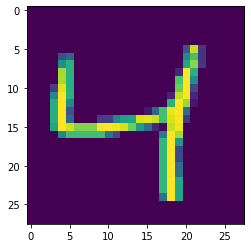

In [ ]:
#matshow() function OR imshow() function is used to represent an array as a matrix in a new figure window. 
#plt.matshow(X_train[0]) OR plt.imshow(X_train[2])
import matplotlib.pyplot as plt
plt.imshow(X_train[2])


In [ ]:
#  Scale the values in Xtrain & Xtest 
X_train=X_train/255
X_test=X_test/255
# Display the length of X_train
print(len(X_train))

60000


In [ ]:
# Flattening Xtrain & Xtest to a 2D array
X_train_flattened=X_train.reshape(-1,784)
X_test_flattened=X_test.reshape(-1,784)
#Display the shape of flattened Xtrain & Xtest
X_train_flattened.shape

(60000, 784)

In [ ]:
#Build the model 
model = keras.Sequential([
   keras.layers.Dense(10, activation='sigmoid')
])
# Apply 'adam' optimizer
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model using fit(). Give epoch as 10
model.fit(X_train_flattened,y_train,epochs=10)
#Evaluate the model 
model.evaluate(X_test_flattened, y_test)

#Predict the values for flattened test dataset
y_predicted = model.predict(X_test_flattened)


#Display the first row of y_predicted
y_predicted[1]


Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4608 - accuracy: 0.8794
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3033 - accuracy: 0.9149
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2833 - accuracy: 0.9208
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2736 - accuracy: 0.9235
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2671 - accuracy: 0.9256
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2615 - accuracy: 0.9275
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2584 - accuracy: 0.9286
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2554 - accuracy: 0.9290
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2527 - accuracy: 0.9297
Epoch 10/10
313/313 [==============================] - 1s 1ms/step - loss: 0.2636 

array([2.6382768e-01, 3.4855604e-03, 9.9981582e-01, 1.2625471e-01,
       2.3025406e-11, 8.9386082e-01, 9.3199778e-01, 1.6089260e-15,
       9.8403245e-02, 5.7996238e-12], dtype=float32)

In [ ]:
# Display the predicted value by applying argmax()
y_predicted_labels = [np.argmax(i) for i in y_predicted]
#Confirm the prediction by displaying the corresponding pixel values using matshow() ir imshow()
y_predicted[0]


array([2.6132762e-03, 1.2963538e-08, 2.0414650e-02, 9.6227682e-01,
       1.5024841e-03, 1.2602210e-01, 3.5109942e-08, 9.9984407e-01,
       8.1136942e-02, 6.4542764e-01], dtype=float32)

In [ ]:
#Display the predicted values  for test dataset. Display only first 5 predicted values
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

#Construct the Confusion Matrix 
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    3,    2,    0,    5,    6,    3,    1,    0],
       [   0, 1116,    4,    2,    0,    1,    4,    2,    6,    0],
       [   4,    8,  940,   13,    8,    4,   12,    9,   30,    4],
       [   3,    0,   25,  911,    0,   29,    3,    9,   19,   11],
       [   1,    1,    6,    2,  907,    0,   12,    4,    9,   40],
       [   9,    4,    3,   29,    7,  782,   16,    7,   29,    6],
       [  10,    3,    8,    1,    7,   12,  914,    1,    2,    0],
       [   1,    6,   27,    4,    6,    1,    0,  944,    2,   37],
       [   6,   12,    7,   19,    9,   27,   11,    9,  862,   12],
       [  11,    7,    1,    8,   21,    6,    0,   17,    6,  932]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

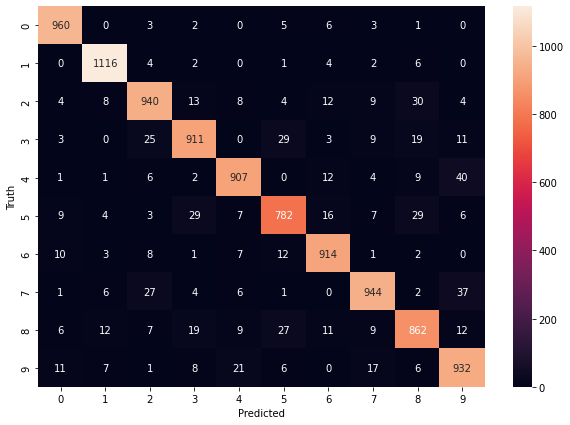

In [ ]:
#Display confusion matrix using heatmap
from sklearn.metrics import confusion_matrix
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


USING HIDDEN LAYER

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2696 - accuracy: 0.9240
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1202 - accuracy: 0.9638
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0843 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0629 - accuracy: 0.9805
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0487 - accuracy: 0.9850


In [ ]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0768 - accuracy: 0.9772


[0.07684215903282166, 0.9771999716758728]

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predicted

array([[6.71359897e-03, 1.97085738e-03, 5.91088593e-01, ...,
        9.99981046e-01, 1.88634187e-01, 4.02851164e-01],
       [3.47872376e-01, 9.31011438e-01, 9.99999046e-01, ...,
        1.05684954e-07, 9.33557034e-01, 3.04874993e-06],
       [1.09201748e-04, 9.97640550e-01, 1.14731222e-01, ...,
        1.93968445e-01, 6.06244922e-01, 2.46641040e-03],
       ...,
       [8.31612738e-07, 7.35858775e-05, 1.24514103e-04, ...,
        9.20154214e-01, 5.54880142e-01, 9.27828312e-01],
       [5.16355336e-02, 1.94145778e-05, 2.53885984e-04, ...,
        4.46671247e-03, 8.74060631e-01, 6.49127787e-06],
       [6.97101235e-01, 2.06932164e-05, 8.65250528e-02, ...,
        1.99901365e-07, 1.13031268e-03, 1.99655806e-05]], dtype=float32)

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]


In [ ]:
y_predicted[0]

array([6.71359897e-03, 1.97085738e-03, 5.91088593e-01, 7.46202528e-01,
       4.65860296e-07, 3.10260355e-02, 1.15369446e-07, 9.99981046e-01,
       1.88634187e-01, 4.02851164e-01], dtype=float32)

In [ ]:
np.argmax(y_predicted[0])

7

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]


[7, 2, 1, 0, 4]

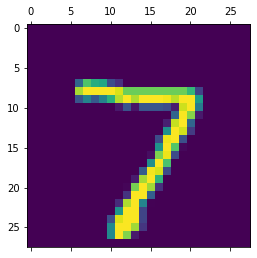

In [ ]:
plt.matshow(X_test[0])

USING FLATTEN LAYER TO CONVERT 2D to 1D

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2720 - accuracy: 0.9223
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1226 - accuracy: 0.9640
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0868 - accuracy: 0.9731
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0661 - accuracy: 0.9800
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0520 - accuracy: 0.9841
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0433 - accuracy: 0.9866
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0348 - accuracy: 0.9891
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0287 - accuracy: 0.9909
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0244 - accuracy: 0.9923
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.019

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0791 - accuracy: 0.9791


[0.079087033867836, 0.9790999889373779]